In [1]:
from xinet import utils
from xinet import torch as xinet

np = xinet.np
nn = xinet.nn

In [2]:
train_iter, test_iter = xinet.load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


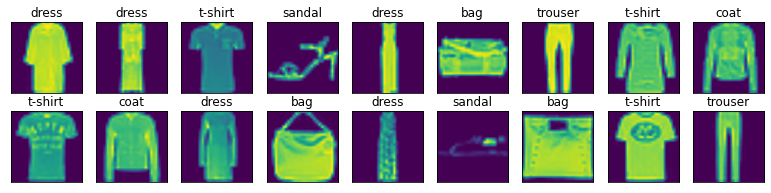

In [3]:
utils.show_images(X.squeeze(axis=1), 2, 9, titles=utils.get_fashion_mnist_labels(y));

In [4]:
y = np.array([0, 2])
y_hat = np.array([[0.1, 0.3, 0.6], 
                  [0.3, 0.2, 0.5]])
y_hat[[0, 1], y]

tensor([0.1000, 0.5000])

In [5]:
# PyTorch不会隐式地调整输入的形状。
# 因此，我们定义了展平层（flatten）在线性层前调整网络输入的形状
net = nn.Sequential(nn.Flatten(), nn.Linear(4096, 10))

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

In [6]:
xinet.evaluate_accuracy(net, test_iter)

0.0998

In [7]:
import torch
trainer = torch.optim.SGD(net.parameters(), lr=0.1)
loss = nn.CrossEntropyLoss()

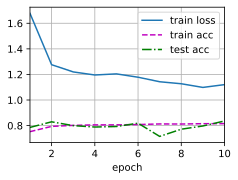

In [8]:
num_epochs = 10
xinet.train(net, train_iter, test_iter, loss, num_epochs, trainer)